In [2]:
import pandas as pd

In [3]:
# dataframe = pd.read_csv("csv/82000278_Toamnei_PM10_2021_7.csv")
dataframe = pd.read_csv("csv/82000278_Toamnei_2022_05.csv")

In [4]:
dataframe.head()

,time,latitude,longitude,altitude,timelocal,temperature,pressure,humidity,voc,noise,co2,ch2o,o3,pm1,pm25,pm10,readable time,day
0,1651363204,45.651464,25.615426,538,914160,6.73,95569,76,215841,43,599,7,20,7,9,10,01-05-22 00:00,01-05-22
1,1651363264,45.651464,25.615426,538,914220,6.71,95569,76,213691,50,601,7,20,7,9,10,01-05-22 00:01,01-05-22
2,1651363324,45.651464,25.615426,538,914280,6.70,95570,76,211822,43,601,7,20,7,9,10,01-05-22 00:02,01-05-22
3,1651363384,45.651464,25.615426,538,914340,6.69,95568,76,206437,42,600,7,20,7,9,10,01-05-22 00:03,01-05-22
4,1651363444,45.651464,25.615426,538,914400,6.67,95568,77,206428,45,602,7,20,7,9,10,01-05-22 00:04,01-05-22


In [5]:
dataframe_size = len(dataframe.index)
dataframe_size

44516

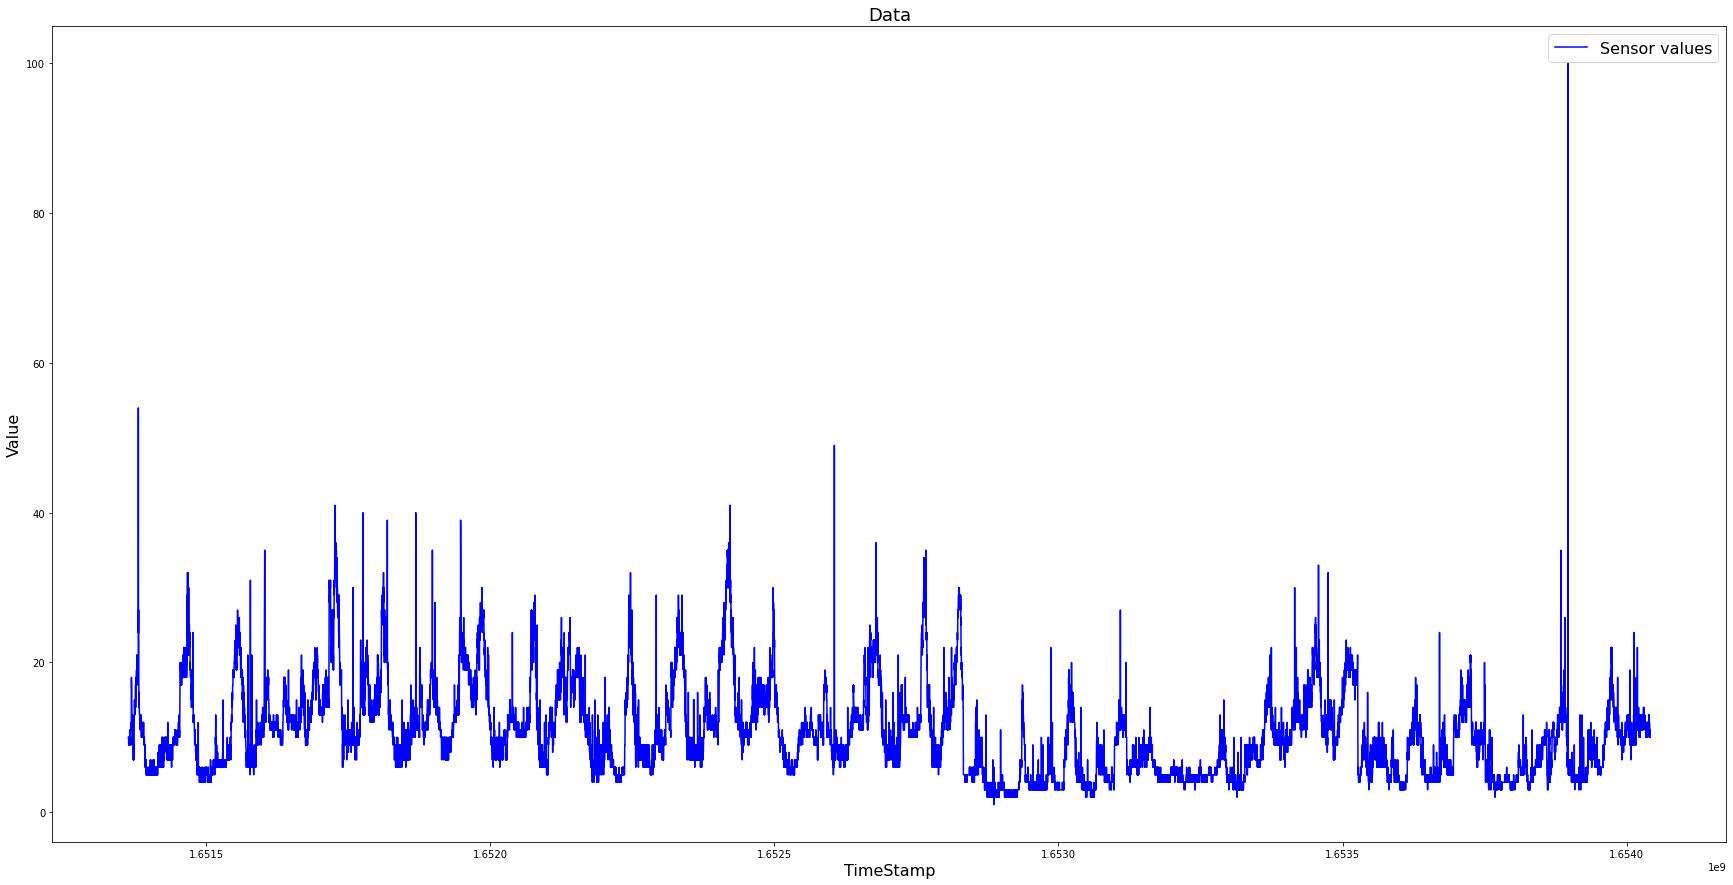

In [6]:
import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(dataframe.get('time'), dataframe.get('pm10'), label="Sensor values", color = "blue")
# plt.scatter(dataframe.get('_source.TimeStamp'), dataframe.get('_source.Value'), color = "red")
plt.xlabel("TimeStamp", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.title("Data", fontsize=18)
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/CSV_Test_Data.jpg', bbox_inches = 'tight')
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [8]:
X = dataframe[["time"]].values
y = dataframe[["pm10"]].values

In [9]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [10]:
y_pred = regressor.predict(X)

In [11]:
print("Slope: ", float(regressor.coef_))
print("Intercept: ", float(regressor.intercept_))

Slope:  -2.3475946917030836e-06
Intercept:  3890.3757793689724


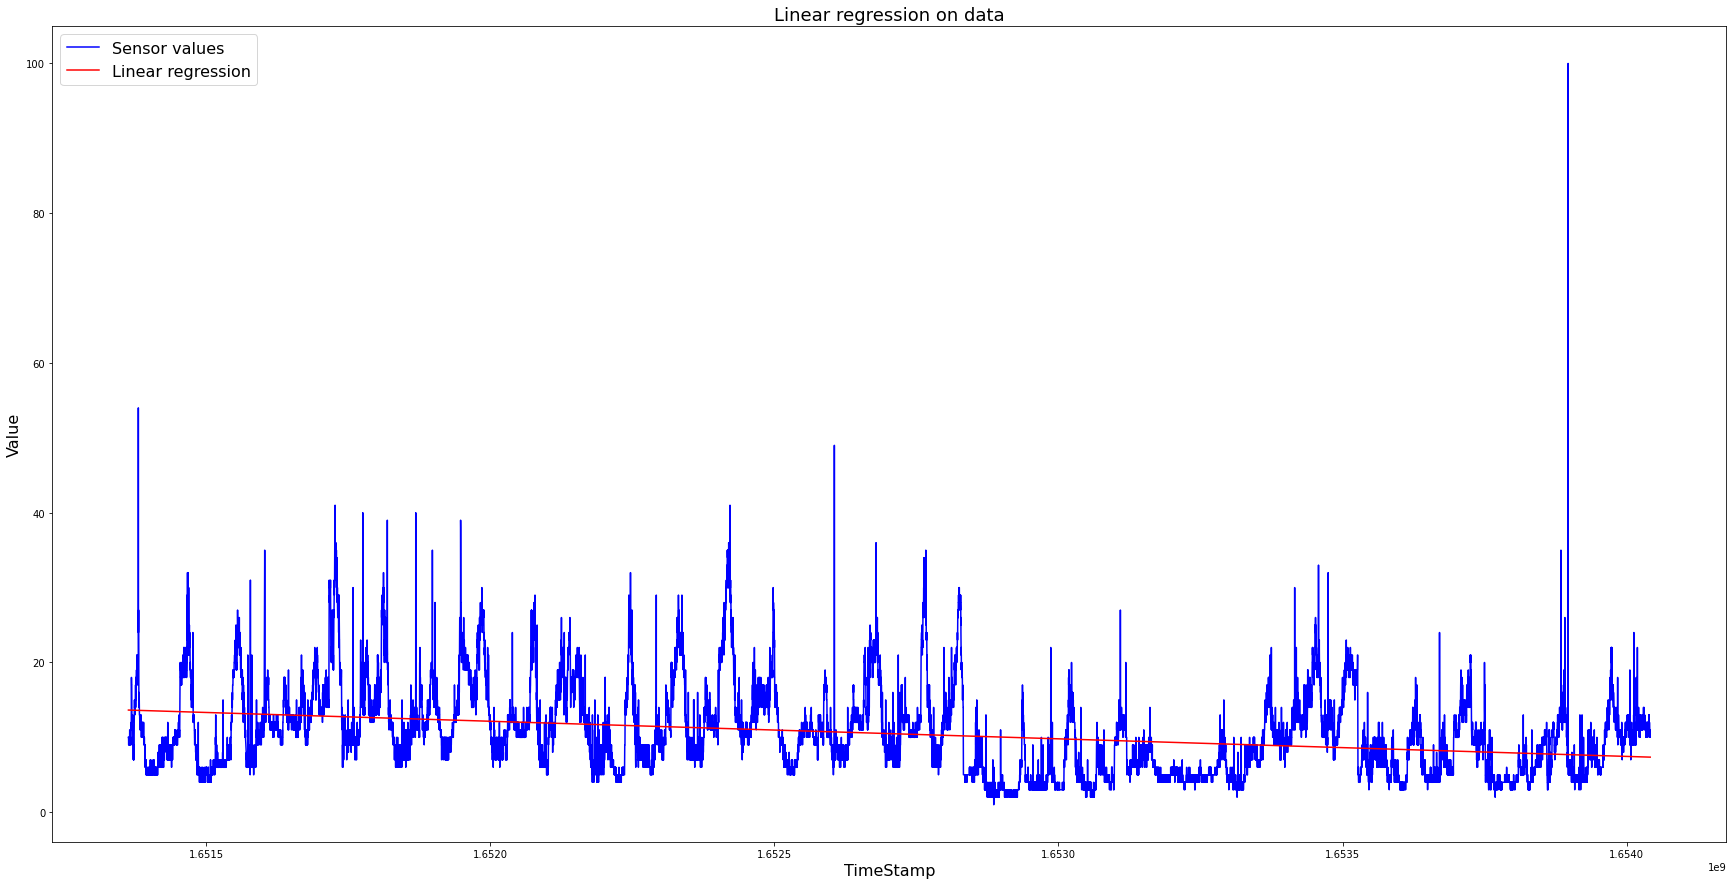

In [12]:
plt.figure(figsize=(30,15))
plt.plot(X,y, color = 'blue', label="Sensor values")
plt.plot(X, regressor.predict(X), color = 'red', label="Linear regression")
plt.title('Linear regression on data', fontsize=18)
plt.xlabel('TimeStamp', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/CSV_Test_Linear.jpg', bbox_inches = 'tight')
plt.show()

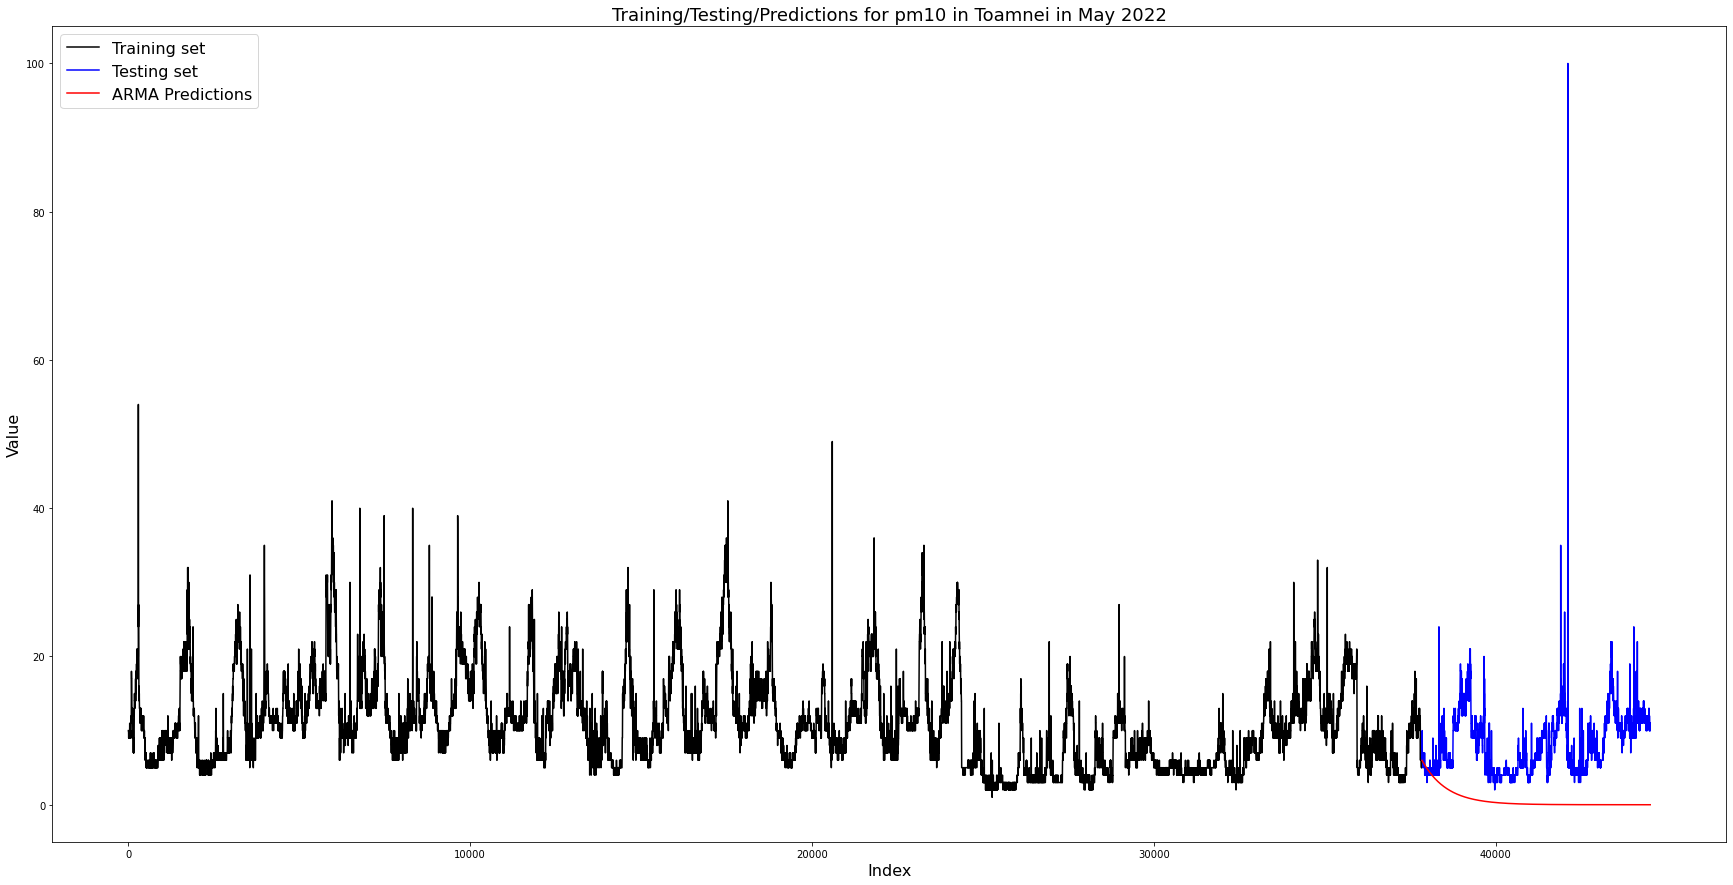

RMSE:  8.735333729859914


In [13]:
train = dataframe[dataframe.index < dataframe_size*(85/100)]
test = dataframe[dataframe.index >= dataframe_size*(85/100)]

from statsmodels.tsa.statespace.sarimax import SARIMAX
y = train['pm10']

ARMAmodel = SARIMAX(y, order=(1,0,1))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(train.index, train.get('pm10'), color = "black", label = "Training set")
plt.plot(test.index, test.get('pm10'), color = "blue", label = "Testing set")
plt.xlabel("Index", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.title("Training/Testing/Predictions for pm10 in Toamnei in May 2022", fontsize=18)
plt.plot(y_pred_out, color='red', label = 'ARMA Predictions')
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/CSV_Test_ARMA.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["pm10"].values, y_pred_df["Predictions"]))
print("RMSE: ", arma_rmse)

In [ ]:
train = dataframe[dataframe.index < dataframe_size*(85/100)]
test = dataframe[dataframe.index >= dataframe_size*(85/100)]

from statsmodels.tsa.statespace.sarimax import SARIMAX
y = train['pm10']

ARMAmodel = SARIMAX(y, order=(1,0,1))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(train.index, train.get('pm10'), color = "black", label = "Training set")
plt.plot(test.index, test.get('pm10'), color = "blue", label = "Testing set")
plt.xlabel("Index", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.title("Training/Testing/Predictions for pm10 in Toamnei in May 2022", fontsize=18)
plt.plot(y_pred_out, color='red', label = 'ARMA Predictions')
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/CSV_Test_ARMA.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["pm10"].values, y_pred_df["Predictions"]))
print("RMSE: ", arma_rmse)

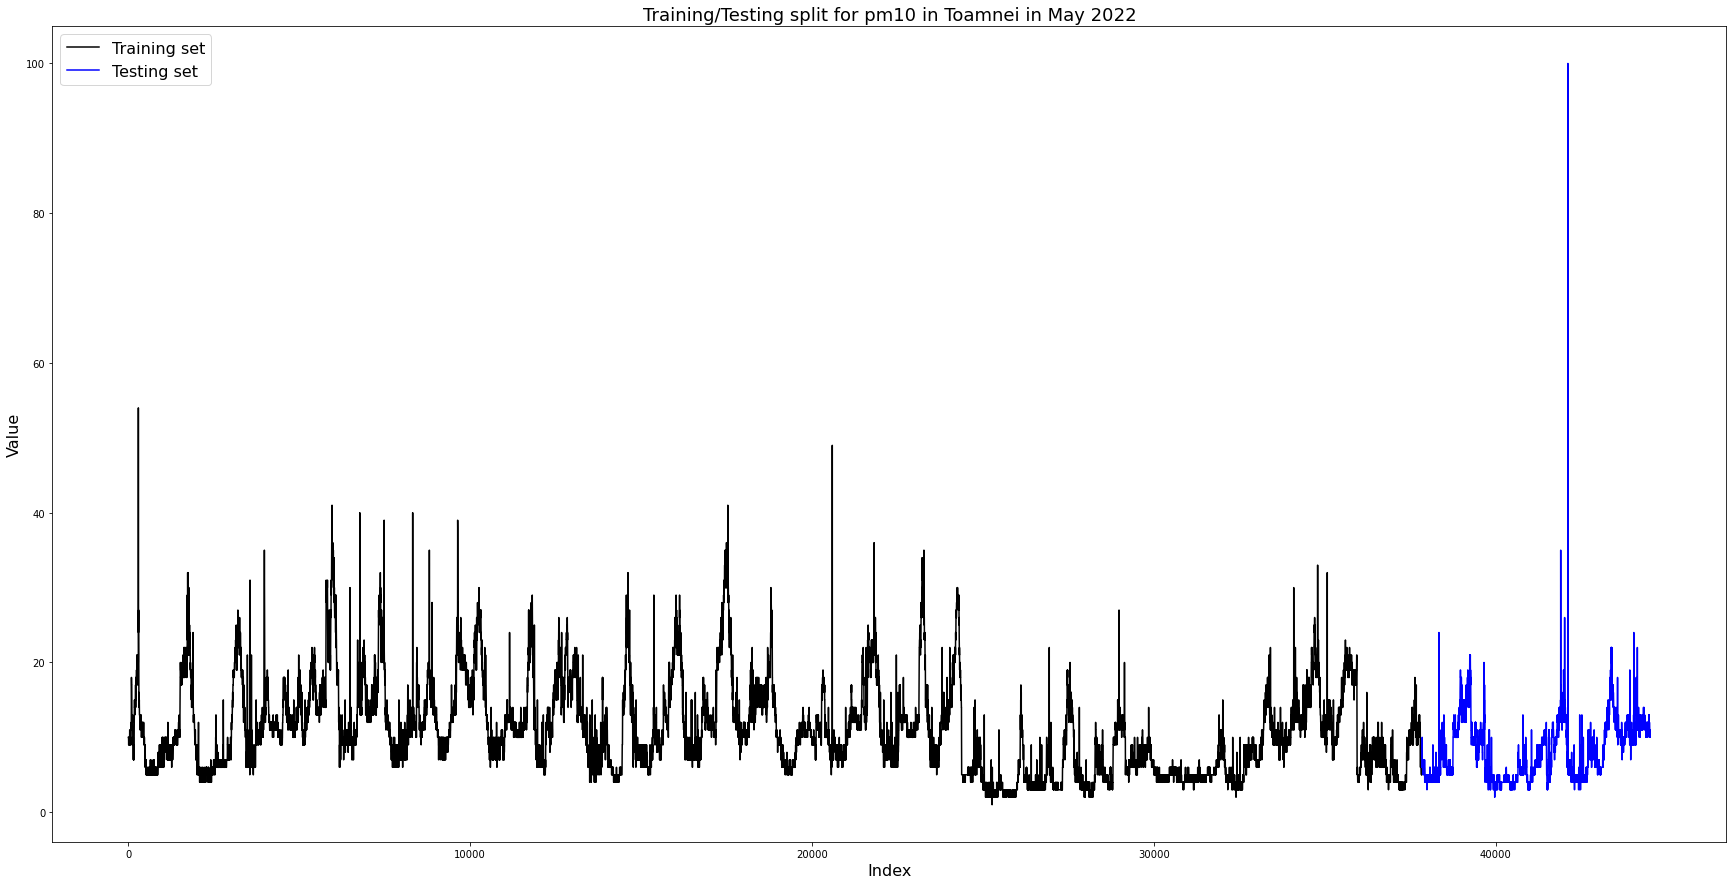

In [16]:
train = dataframe[dataframe.index < dataframe_size*(85/100)]
test = dataframe[dataframe.index >= dataframe_size*(85/100)]

from statsmodels.tsa.statespace.sarimax import SARIMAX
# y = train['pm10']

# ARMAmodel = SARIMAX(y, order=(31,0,1))
# ARMAmodel = ARMAmodel.fit()
# y_pred = ARMAmodel.get_forecast(len(test.index))
# y_pred_df = y_pred.conf_int(alpha=0.05)
# y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
# y_pred_df.index = test.index
# y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(train.index, train.get('pm10'), color = "black", label = "Training set")
plt.plot(test.index, test.get('pm10'), color = "blue", label = "Testing set")
plt.xlabel("Index", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.title("Training/Testing split for pm10 in Toamnei in May 2022", fontsize=18)
# plt.plot(y_pred_out, color='red', label = 'ARMA Predictions')
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/CSV_Test_Split.jpg', bbox_inches = 'tight')
plt.show()


# import numpy as np
# from sklearn.metrics import mean_squared_error

# arma_rmse = np.sqrt(mean_squared_error(test["pm10"].values, y_pred_df["Predictions"]))
# print("RMSE: ", arma_rmse)

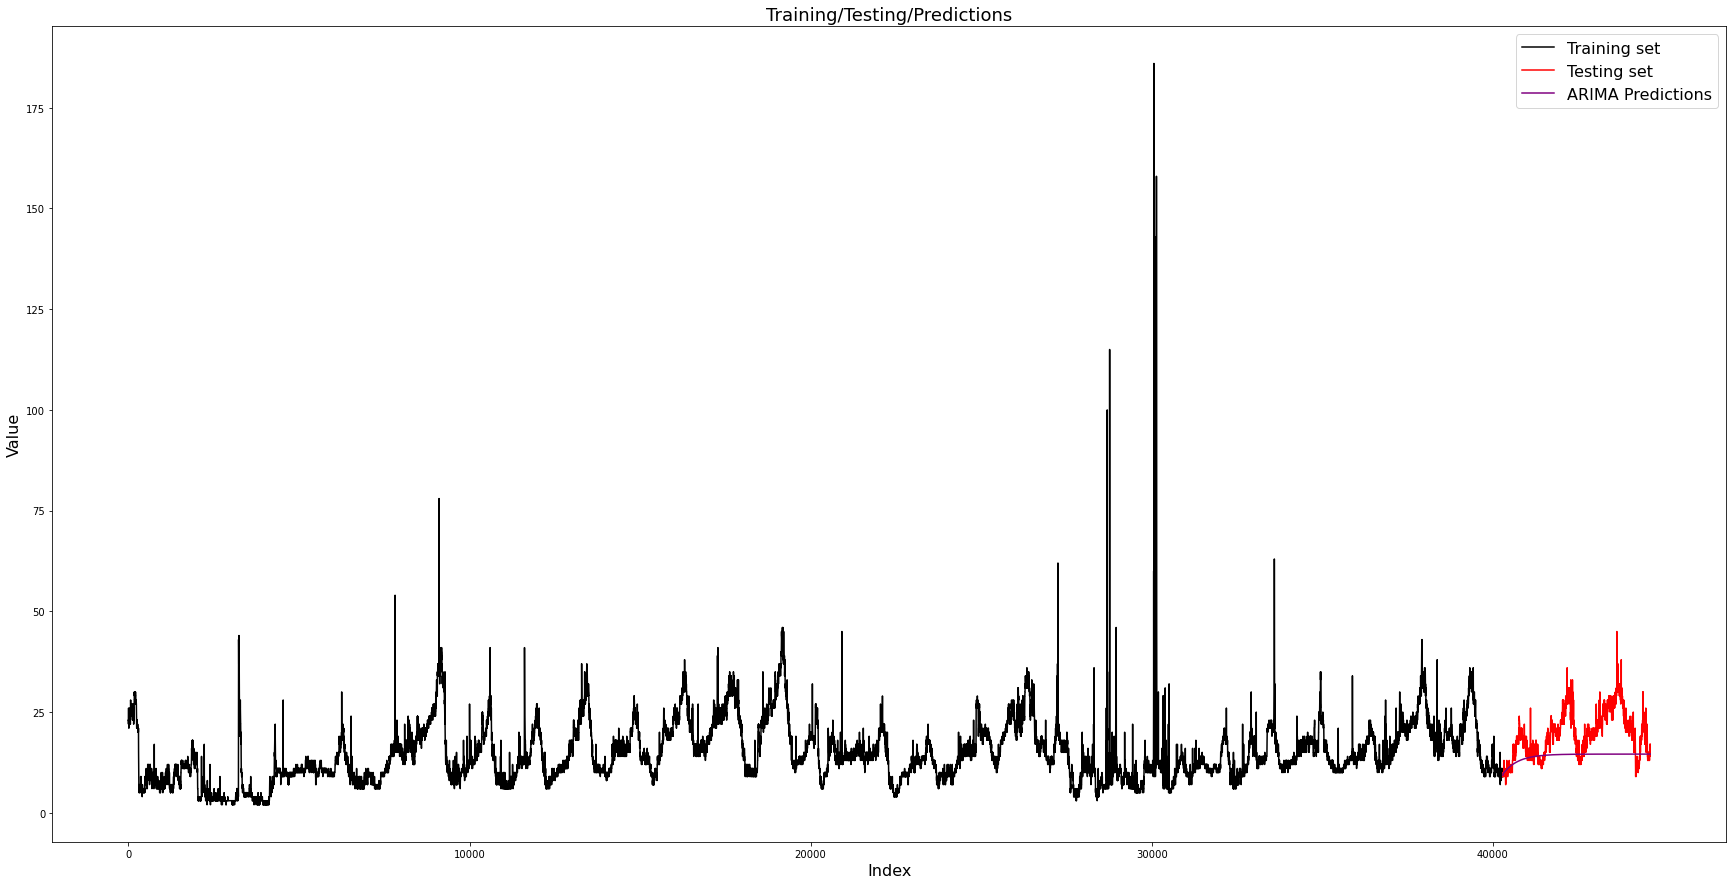

RMSE:  7.425513307127508


In [13]:
train = dataframe[dataframe.index < dataframe_size*(28/31)]
test = dataframe[dataframe.index >= dataframe_size*(28/31)]

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
y = train['pm10']

ARMAmodel = ARIMA(y, order=(2,0,2))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(train.index, train.get('pm10'), color = "black", label = "Training set")
plt.plot(test.index, test.get('pm10'), color = "red", label = "Testing set")
plt.xlabel("Index", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.title("Training/Testing/Predictions", fontsize=18)
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions')
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/CSV_Test_ARIMA.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

arima_rmse1 = np.sqrt(mean_squared_error(test["pm10"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse1)

C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


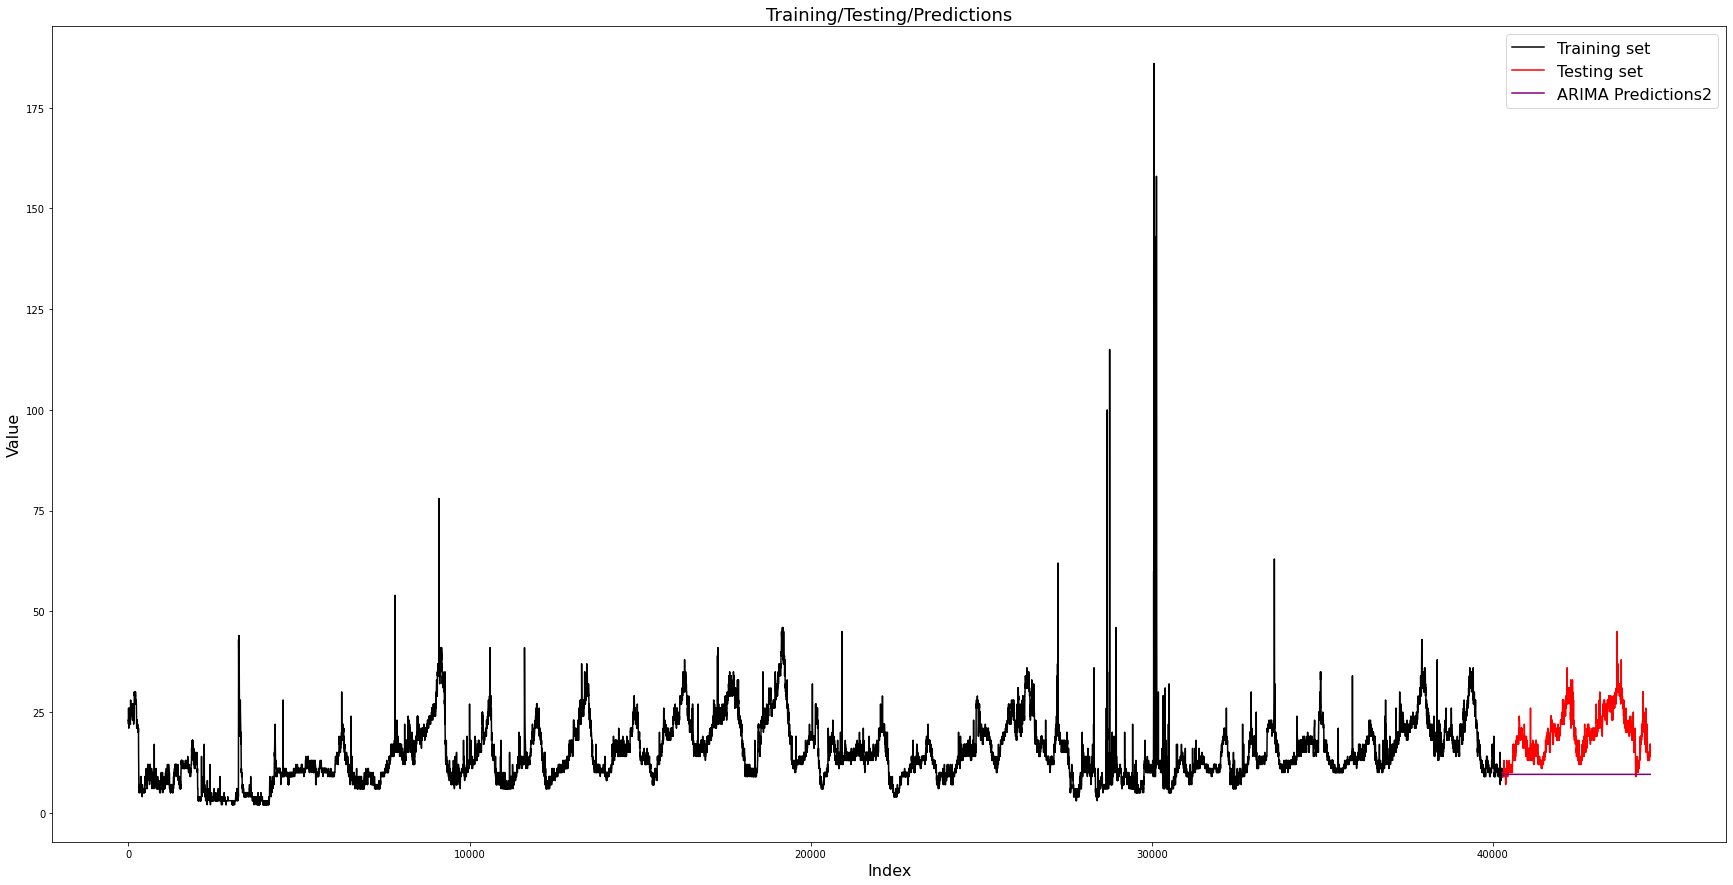

RMSE:  11.324870878474837


In [14]:
train = dataframe[dataframe.index < dataframe_size*(28/31)]
test = dataframe[dataframe.index >= dataframe_size*(28/31)]

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
y = train['pm10']

ARMAmodel = ARIMA(y, order=(31,1,3))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(train.index, train.get('pm10'), color = "black", label = "Training set")
plt.plot(test.index, test.get('pm10'), color = "red", label = "Testing set")
plt.xlabel("Index", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.title("Training/Testing/Predictions", fontsize=18)
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions2')
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/CSV_Test_ARIMA_v2.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

arima_rmse2 = np.sqrt(mean_squared_error(test["pm10"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse2)